In [2]:
%pylab inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from cartopy.io import PostprocessedRasterSource, LocatedImage
from cartopy.io import srtm
from cartopy.io.srtm import SRTM3Source
import cartopy.feature as cfeature

# from scipy.io import netcdf

from PIL import Image
import imageio

import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [2]:
events_by_year = np.load('events_4.5+by_year_1970-2019.npy').item()

In [3]:
low_res_bg_image = imageio.read("Etopo1_2400x1200.tif")
low_res_etopo_bg = low_res_bg_image.get_data(0)

In [4]:
norm_eqdep = matplotlib.colors.Normalize(vmin = 0.0, vmax = 200, clip = False)

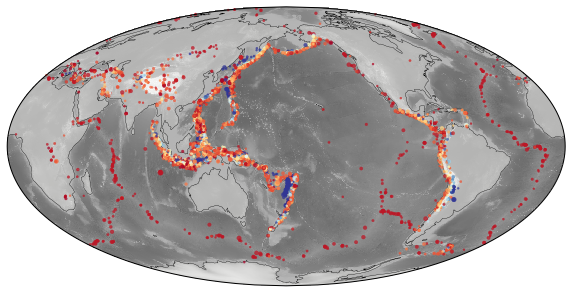

In [7]:
## Test plot

bg_projection = ccrs.PlateCarree()
eqs = events_by_year[2000]

fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180.0))
ax.set_global()


ax.add_feature(cfeature.LAND, edgecolor="black", alpha=0.2, linewidth=0.25)
# ax.add_feature(ocean, alpha=0.1, zorder=1)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, linewidth=0.33)

ax.imshow(low_res_etopo_bg, origin='upper', transform=bg_projection, 
          zorder=0, cmap="gray", alpha=0.75)

plt.scatter(eqs[:,0], eqs[:,1], c=eqs[:,2]*0.001, cmap=mpl.cm.RdYlBu, norm=norm_eqdep, linewidth=0.33, 
            s=(eqs[:,3]-4.0)*7.5, transform=ccrs.Geodetic(), alpha=0.75, zorder=2)


In [22]:

projection = ccrs.Mollweide(central_longitude=180.0)
bg_projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")
ax = plt.axes(projection=projection)
ax.set_global()

ax.add_feature(cfeature.LAND, edgecolor="black", alpha=0.2, linewidth=0.25)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, linewidth=0.33)


for this_year in range(1975, 2020):
        print("Mapping EQs for {}".format(this_year))

# Add the image once you are happy to wait ages for the frames to appear. 

#         ax.imshow(low_res_etopo_bg, origin='upper', transform=bg_projection, 
#                   extent=global_extent, zorder=0, cmap="gray")


        eqs = events_by_year[this_year]

        plt.scatter(eqs[:,0], eqs[:,1], c=eqs[:,2]*0.001, cmap=mpl.cm.RdYlBu, norm=norm_eqdep, linewidth=0.33, 
                    s=(eqs[:,3]-4.0)*2.5, transform=ccrs.Geodetic(), alpha=0.75, zorder=2)

        plt.savefig("GlobalCumlEqMap.{}.png".format(this_year), dpi=300, frameon=False, edgecolor="none", 
                 facecolor="none", bbox_inches='tight', pad_inches=0.0)


plt.close()


Mapping EQs for 1975
Mapping EQs for 1976
Mapping EQs for 1977
Mapping EQs for 1978
Mapping EQs for 1979
Mapping EQs for 1980
Mapping EQs for 1981
Mapping EQs for 1982
Mapping EQs for 1983
Mapping EQs for 1984
Mapping EQs for 1985
Mapping EQs for 1986
Mapping EQs for 1987
Mapping EQs for 1988
Mapping EQs for 1989
Mapping EQs for 1990
Mapping EQs for 1991
Mapping EQs for 1992
Mapping EQs for 1993
Mapping EQs for 1994
Mapping EQs for 1995
Mapping EQs for 1996
Mapping EQs for 1997
Mapping EQs for 1998
Mapping EQs for 1999
Mapping EQs for 2000
Mapping EQs for 2001
Mapping EQs for 2002
Mapping EQs for 2003
Mapping EQs for 2004
Mapping EQs for 2005
Mapping EQs for 2006
Mapping EQs for 2007
Mapping EQs for 2008
Mapping EQs for 2009
Mapping EQs for 2010
Mapping EQs for 2011
Mapping EQs for 2012
Mapping EQs for 2013
Mapping EQs for 2014
Mapping EQs for 2015
Mapping EQs for 2016
Mapping EQs for 2017
Mapping EQs for 2018
Mapping EQs for 2019


In [32]:
from glob import glob
image_files = sort(glob("GlobalCumlEqMap.*.png"))

from PIL import Image

movie = imageio.get_writer('./GlobalEQCumulative.gif', fps=12.5)

for image_file in image_files:
    
    print("File: {}".format(image_file))
    
    im0 = imageio.imread(image_file)
    img = Image.fromarray(im0)
    im2 = img.resize((640,320), Image.BILINEAR )
        
    movie.append_data(np.array(im2))
    

movie.close()

ValueError: Could not find a format to write the specified file in mode '?'

In [30]:
pix = numpy.array(im2)
pix.shape

(320, 640, 4)

In [4]:
!ls -l *.gif

-rw-r--r--  1 lmoresi  staff  33149128  9 May 21:31 GlobalEQCumulative.gif
